In [1]:
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, Flatten, Dense
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import pickle

train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest')

test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    "C:\\Users\\User\\Desktop\\Stage\\Optimal try\\images\\Train",
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical')

validation_generator = test_datagen.flow_from_directory(
    "C:\\Users\\User\\Desktop\\Stage\\Optimal try\\images\\Validation",
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical')

def ZFNet(input_shape=(224, 224, 3), num_classes=3):
    inputs = Input(shape=input_shape)
    x = Conv2D(96, (7, 7), strides=(2, 2), activation='relu', padding='valid')(inputs)
    x = MaxPooling2D((3, 3), strides=(2, 2))(x)
    x = Conv2D(256, (5, 5), activation='relu', padding='same')(x)
    x = MaxPooling2D((3, 3), strides=(2, 2))(x)
    x = Conv2D(384, (3, 3), activation='relu', padding='same')(x)
    x = Conv2D(384, (3, 3), activation='relu', padding='same')(x)
    x = Conv2D(256, (3, 3), activation='relu', padding='same')(x)
    x = MaxPooling2D((3, 3), strides=(2, 2))(x)
    x = Flatten()(x)
    x = Dense(4096, activation='relu')(x)
    
    outputs = Dense(num_classes, activation='softmax')(x)
    
    model = Model(inputs, outputs)
    return model

model = ZFNet()

model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001), 
              loss='categorical_crossentropy', 
              metrics=['accuracy'])

Found 463 images belonging to 3 classes.
Found 110 images belonging to 3 classes.


In [2]:
Model_Checkpoint = tf.keras.callbacks.ModelCheckpoint(
    'ZFNetmodelsave.keras',
    monitor='val_accuracy',
    save_best_only='True',
    verbose=1
)

Epoch 1/300


c:\Users\User\anaconda3\envs\vae_stud\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 3s/step - accuracy: 0.5113 - loss: 2.6021
Epoch 1: val_accuracy improved from -inf to 0.25455, saving model to ZFNetmodelsave.keras
15/15 ━━━━━━━━━━━━━━━━━━━━ 55s 3s/step - accuracy: 0.5095 - loss: 2.5458 - val_accuracy: 0.2545 - val_loss: 1.0555
Epoch 2/300
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 3s/step - accuracy: 0.4314 - loss: 0.9405
Epoch 2: val_accuracy improved from 0.25455 to 0.61818, saving model to ZFNetmodelsave.keras
15/15 ━━━━━━━━━━━━━━━━━━━━ 68s 5s/step - accuracy: 0.4322 - loss: 0.9387 - val_accuracy: 0.6182 - val_loss: 0.7773
Epoch 3/300
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 3s/step - accuracy: 0.5161 - loss: 0.8396
Epoch 3: val_accuracy did not improve from 0.61818
15/15 ━━━━━━━━━━━━━━━━━━━━ 50s 3s/step - accuracy: 0.5149 - loss: 0.8371 - val_accuracy: 0.6182 - val_loss: 0.6499
Epoch 4/300
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 3s/step - accuracy: 0.5055 - loss: 0.7461
Epoch 4: val_accuracy improved from 0.61818 to 0.65455, saving model to ZFNetmodelsave.keras
15/1

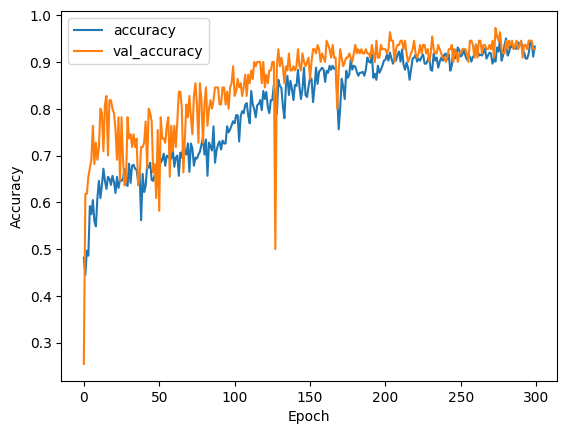

In [3]:
history = model.fit(
    train_generator,
    epochs=300,  
    validation_data=validation_generator,
    batch_size=32,
    callbacks=[Model_Checkpoint])  

with open('ZFNettraining_history.pkl', 'wb') as file_pi:
    pickle.dump(history.history, file_pi)
    
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

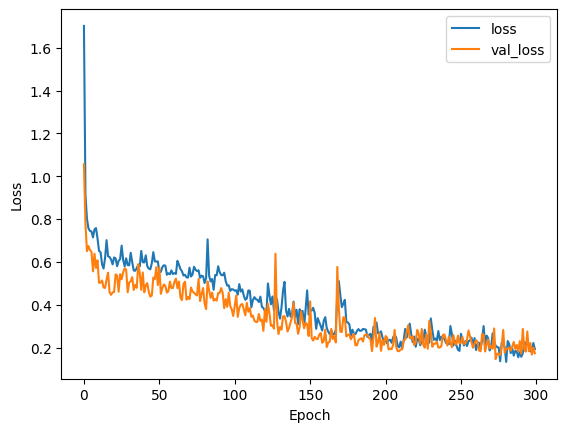

In [8]:
train_loss = history.history['loss']
val_loss = history.history['val_loss']
plt.plot(train_loss, label='loss')
plt.plot(val_loss, label='val_loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [9]:
test_generator = test_datagen.flow_from_directory(
    "C:\\Users\\User\\Desktop\\Stage\\Optimal Try\\images\\Test",
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical',
    shuffle=False)

test_loss, test_accuracy = model.evaluate(test_generator)
print(f'Test accuracy: {test_accuracy * 100:.2f}%')
print(f'Test loss: {test_loss:.4f}')

Found 70 images belonging to 3 classes.


c:\Users\User\anaconda3\envs\vae_stud\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 339ms/step - accuracy: 0.8946 - loss: 1.9963
Test accuracy: 91.43%
Test loss: 1.5297


In [6]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
test_generator.reset()
Y_pred = model.predict(test_generator)
y_pred = np.argmax(Y_pred, axis=1)
y_true = test_generator.classes

cm = confusion_matrix(y_true, y_pred)

3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 365ms/step


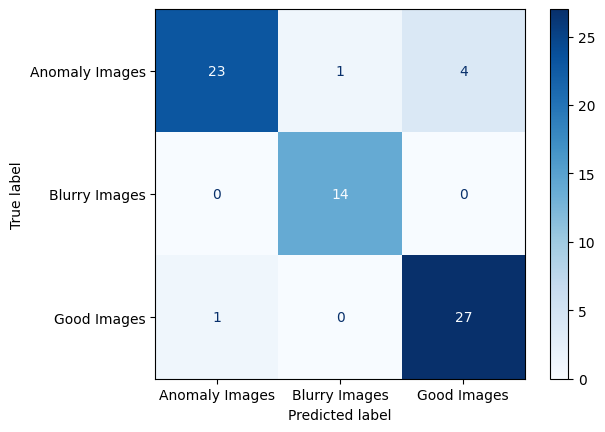

In [10]:
labels = list(test_generator.class_indices.keys())
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labels)
disp.plot(cmap=plt.cm.Blues)
plt.show()